In [1319]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1320]:
#load the dataset
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,45,housemaid,divorced,primary,no,413.0,yes,no,unknown,30.0,may,65.0,1,-1.0,0,unknown,no
10857,51,admin.,married,secondary,no,4178.0,yes,no,unknown,30.0,may,556.0,1,-1.0,0,unknown,no
10858,40,management,married,tertiary,no,2147.0,yes,no,unknown,30.0,may,115.0,1,-1.0,0,unknown,no
10859,43,blue-collar,married,secondary,no,1096.0,no,yes,unknown,30.0,may,180.0,1,-1.0,0,unknown,no


In [1321]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [1322]:
#check valuecount of target
df['y'].value_counts()

,count
y,
no,5572
yes,5289


In [1323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [1324]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [1325]:
df.shape

(10861, 17)

In [1326]:
#check for null values
df.isnull().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


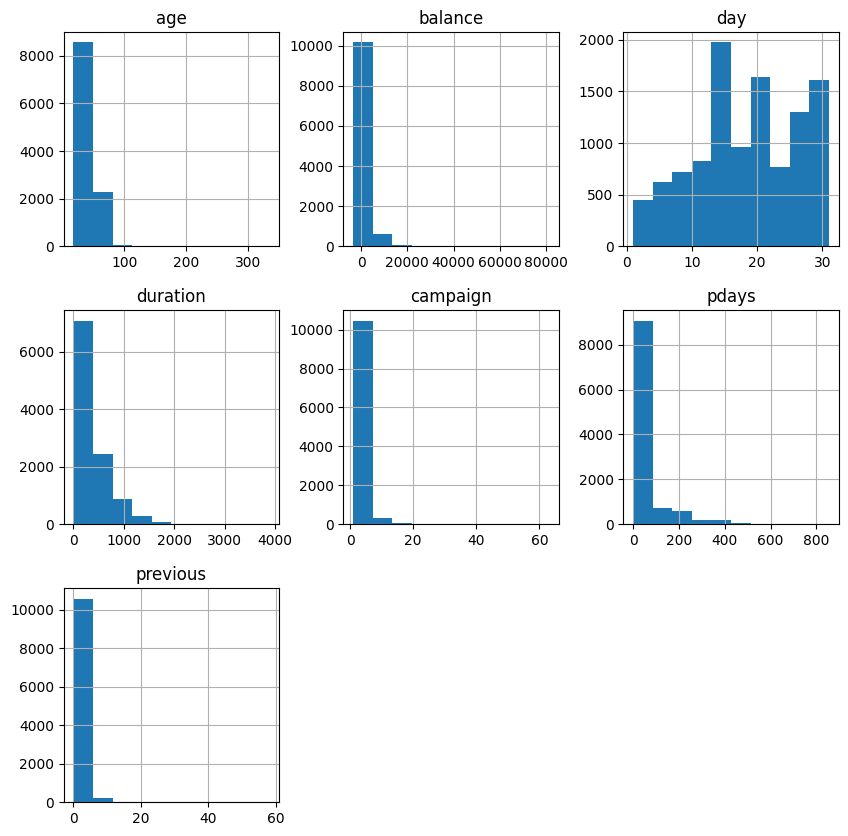

In [1327]:
#plot histogram
df.hist(figsize=(10,10))
plt.show()

In [1328]:
#remove null values
df['balance'].fillna(df['balance'].median(), inplace=True)
df['duration'].fillna(df['duration'].mean(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['day'].fillna(df['day'].mean(), inplace=True)
df['pdays'].fillna(df['pdays'].median(), inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)


In [1329]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


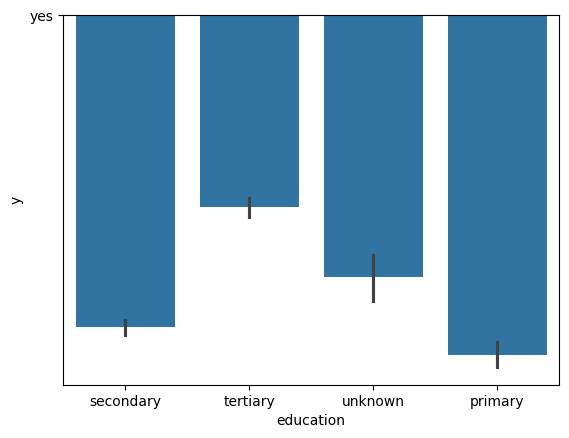

In [1330]:
#ploting bargraph of education with target
sns.barplot(x='education',y='y',data=df)

plt.show()

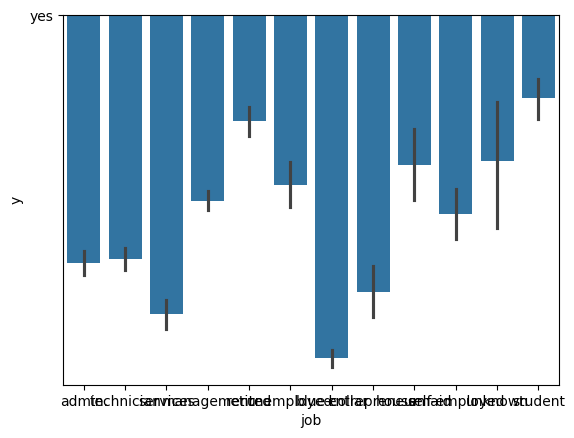

In [1331]:
#bargraph with job and target
sns.barplot(x='job',y='y',data=df)
plt.show()

In [1332]:
df.shape

(10861, 17)

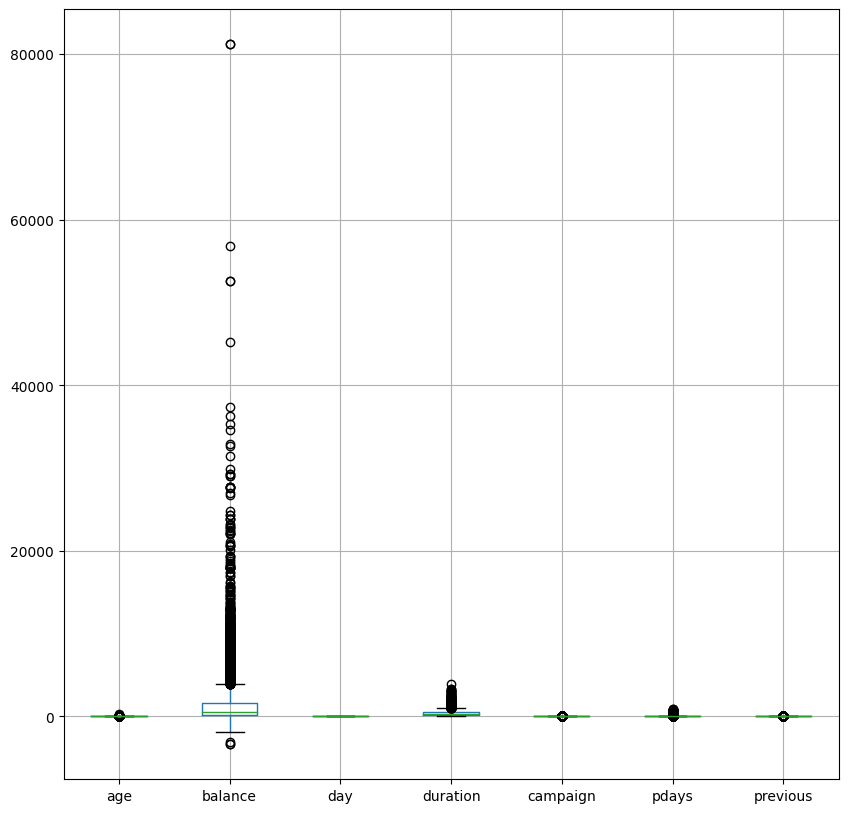

In [1333]:
#box plot for detecting outliers
df.boxplot(figsize=(10,10))
plt.show()

In [1334]:
df.shape

(10861, 17)

In [1335]:
#handling outliers using iqr
outlier=['age','balance','duration','campaign','pdays','previous']
for i in outlier:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper_limit=q3+1.5*iqr
  lower_limit=q1-1.5*iqr
  df[i]=np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))


In [1336]:
df.shape

(10861, 17)

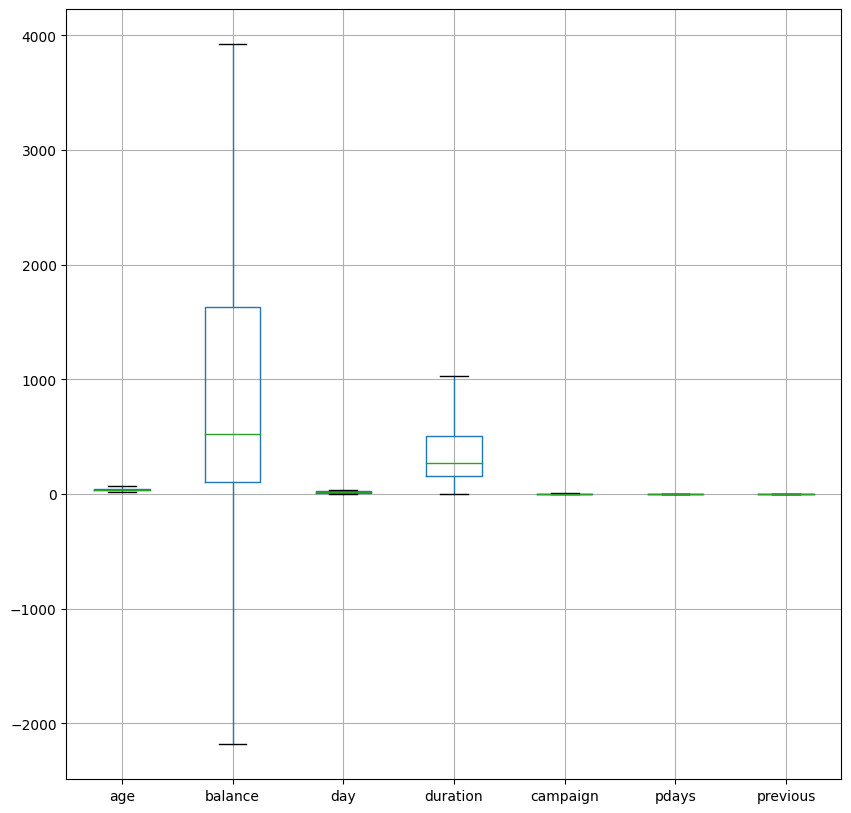

In [1337]:
df.boxplot(figsize=(10,10))
plt.show()

In [1338]:
#droping columns
df.drop(['pdays','previous'],axis=1,inplace=True)


In [1339]:
df.shape

(10861, 15)

In [1340]:
# encode y
df['y']=df['y'].map({'yes':1,'no':0})

In [1341]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1032.0,1.0,unknown,1
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1032.0,1.0,unknown,1
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1032.0,1.0,unknown,1
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,unknown,1
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,unknown,1


In [1342]:
df['y'].value_counts()

,count
y,
0,5572
1,5289


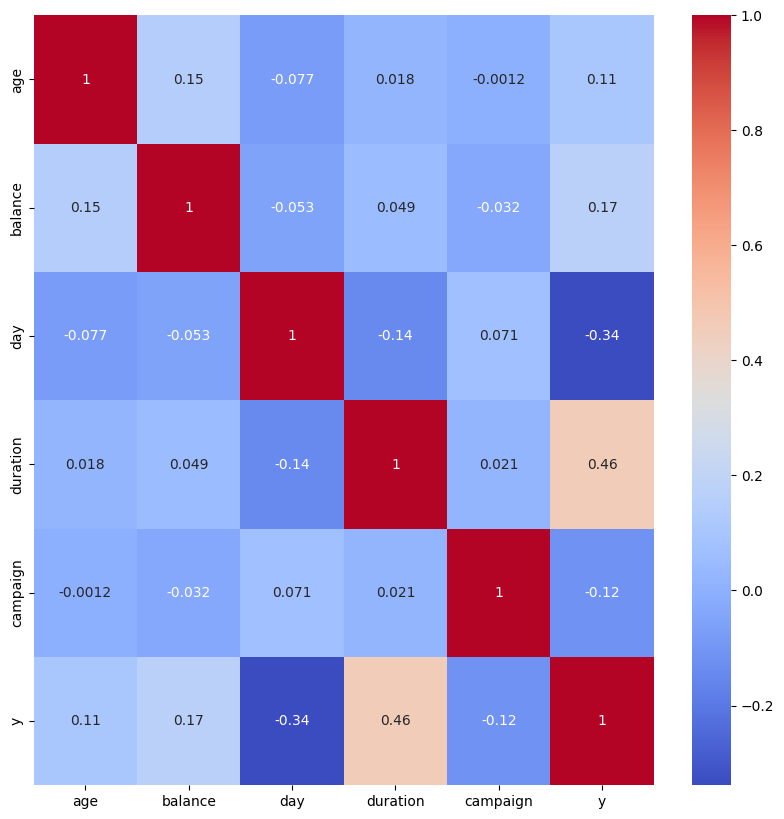

In [1343]:
#correlation matrix
numerical=df.select_dtypes(include=['int64','float64'])
corr=numerical.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [1344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  float64
 1   job        10861 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10861 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10861 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10861 non-null  object 
 8   contact    10861 non-null  object 
 9   day        10861 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10861 non-null  float64
 12  campaign   10861 non-null  float64
 13  poutcome   10861 non-null  object 
 14  y          10861 non-null  int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 1.2+ MB


In [1345]:
df.y.value_counts()

,count
y,
0,5572
1,5289


In [1346]:
categorical=df.select_dtypes(include=['object'])
categorical

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
10856,housemaid,divorced,primary,no,yes,no,unknown,may,unknown
10857,admin.,married,secondary,no,yes,no,unknown,may,unknown
10858,management,married,tertiary,no,yes,no,unknown,may,unknown
10859,blue-collar,married,secondary,no,no,yes,unknown,may,unknown


In [1347]:
#encoding all categorical columns using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical=df.select_dtypes(include=['object'])
for i in categorical.columns:
  df[i]=le.fit_transform(df[i])

In [1348]:
df.y.value_counts()

,count
y,
0,5572
1,5289


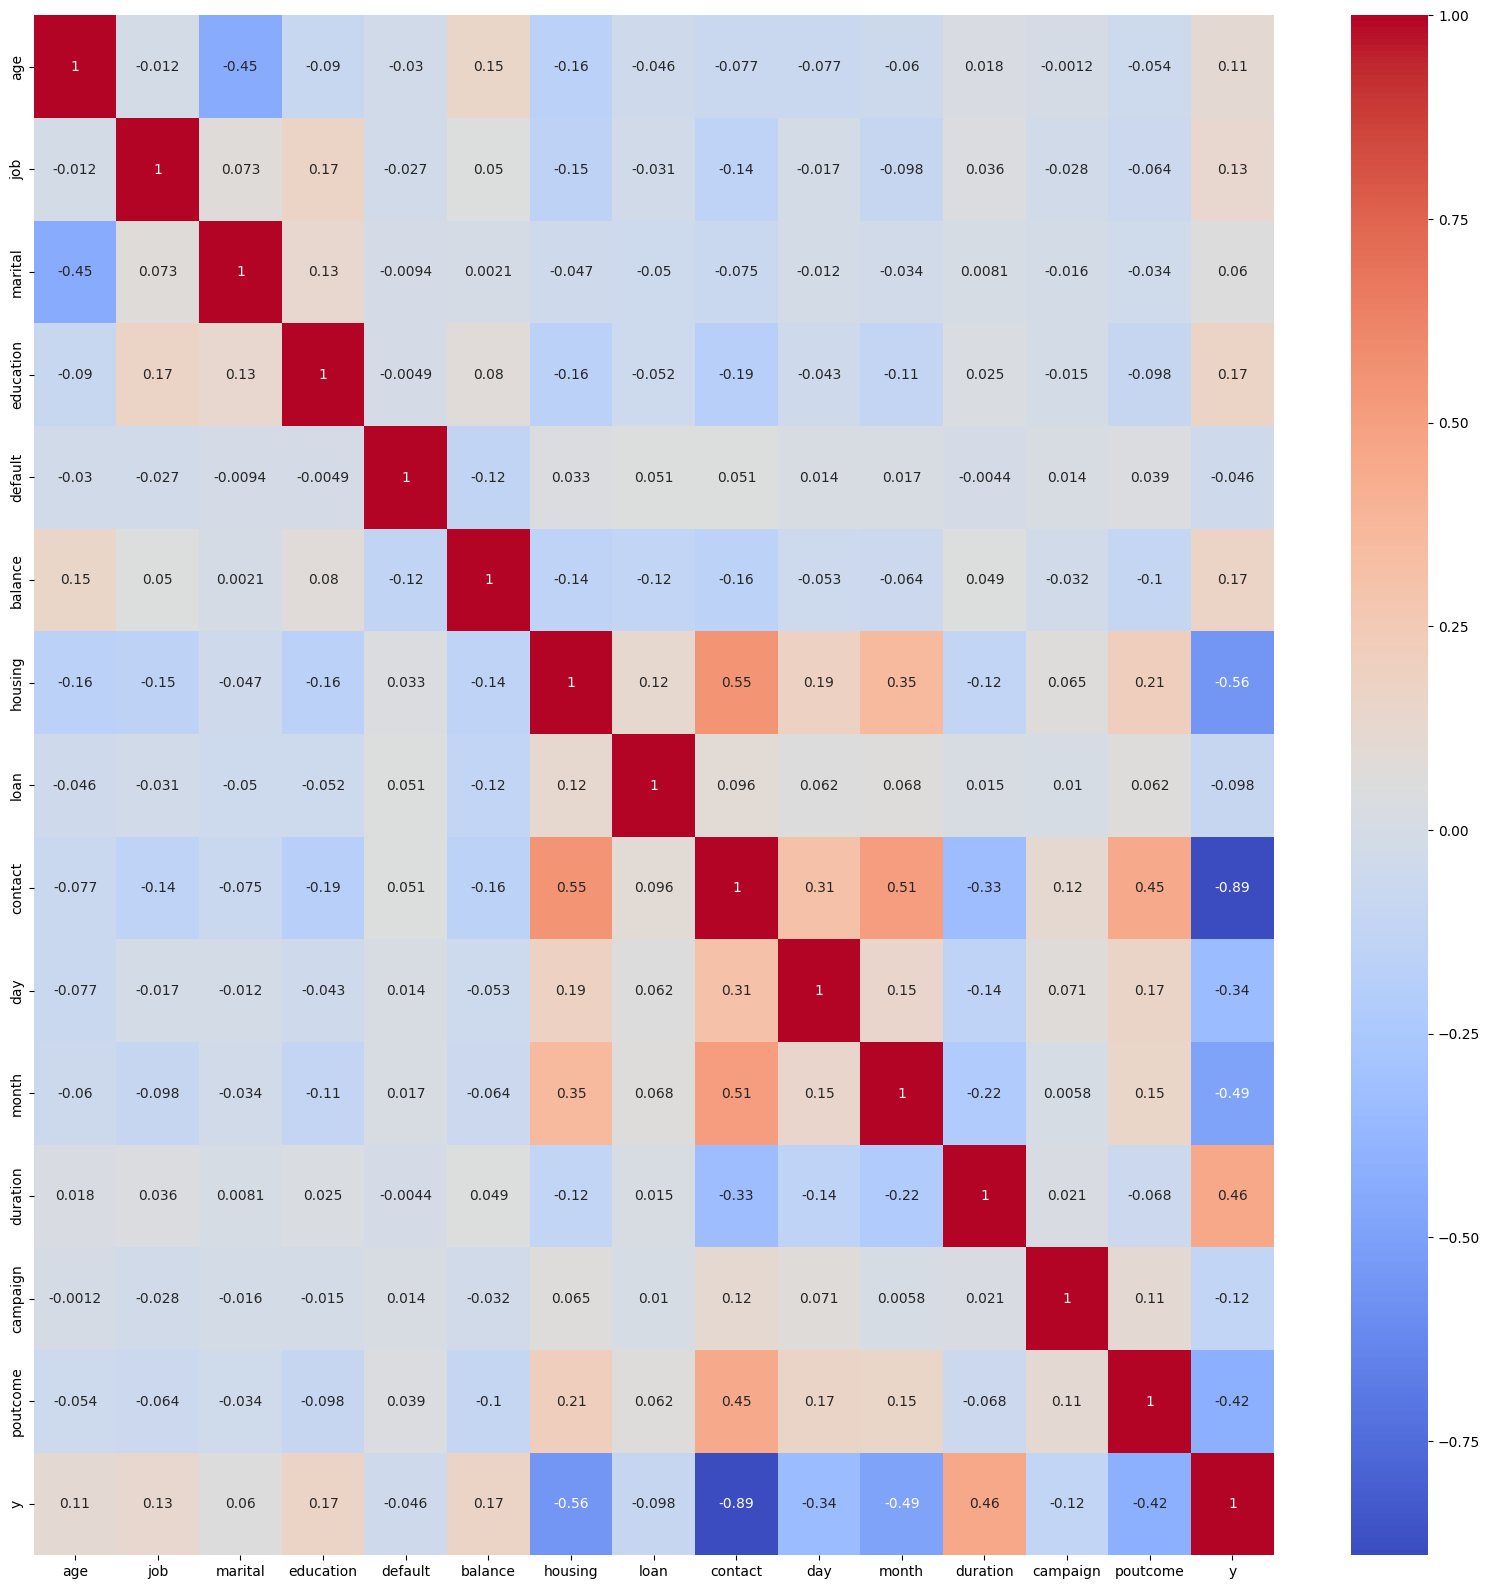

In [1349]:
#correlation matrix of df
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


In [1350]:
df.shape

(10861, 15)

In [1351]:
#drop columns
df.drop(['default','loan','marital','campaign'],axis=1,inplace=True)

In [1352]:
df.shape

(10861, 11)

In [1353]:
#defining x and y
x=df.drop('y',axis=1)
y=df['y']


In [1354]:
x.tail()

,age,job,education,balance,housing,contact,day,month,duration,poutcome
10856,45.0,3,0,413.0,1,2,30.0,8,65.0,3
10857,51.0,0,1,3922.0,1,2,30.0,8,556.0,3
10858,40.0,4,2,2147.0,1,2,30.0,8,115.0,3
10859,43.0,1,1,1096.0,0,2,30.0,8,180.0,3
10860,41.0,0,2,1455.0,1,2,30.0,8,87.0,3


In [1355]:
#scaling x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [1356]:
#spliting x and y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Random forest classifier


In [1357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9848136217211229
[[1106    9]
 [  24 1034]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1115
           1       0.99      0.98      0.98      1058

    accuracy                           0.98      2173
   macro avg       0.99      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173



hyperparameter tuning


In [1358]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}





grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)




Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score:  0.9797421731123389


xg boost classifier


In [1359]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.98067188219052
[[1099   16]
 [  26 1032]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1115
           1       0.98      0.98      0.98      1058

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173



gaussian naive bayes


In [1360]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9797514956281639
[[1115    0]
 [  44 1014]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1115
           1       1.00      0.96      0.98      1058

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173



since i got highest accuracy for randomforest i selected that model

new value prediction using random forest

In [1361]:
#new value predict
new_data={
    'age':41.0,
    'job':9,
    'education':1,
    'balance':1270.0,
    'housing':1,
    'contact':2,
    'day':5.0,
    'month':8,
    'duration':1032.0,
    'poutcome':3
}
new_data=pd.DataFrame(new_data,index=[0])
new_data=sc.transform(new_data)
new_pred=rf.predict(new_data)
if new_pred[0]==1:
  print('yes')
else:
  print('no')



yes


In [1362]:
#new value predict
new_data={
    'age':43.0,
    'job':1,
    'education':1,
    'balance':1096.0,
    'housing':0,
    'contact':2,
    'day':30.0,
    'month':8,
    'duration':180.0,
    'poutcome':3
}
new_data=pd.DataFrame(new_data,index=[0])
new_data=sc.transform(new_data)
new_pred=rf.predict(new_data)
if new_pred[0]==1:
  print('yes')
else:
  print('no')


no
